In [1]:
import os
os.chdir('..')
from notebooks import config
import torch
import glob
import numpy as np
from dataloader.preprocess import crop_scales, crop
from dataloader.preprocess import read_normalize
from utils.imgShow import imgShow,imsShow
import matplotlib.pyplot as plt
import random
import cv2


In [2]:
# ---------- Data paths ----------- #
paths_as = sorted(glob.glob(config.dir_as + '/*pad*.tif'))
paths_des = sorted(glob.glob(config.dir_des+'/*pad*.tif'))
paths_truth = sorted(glob.glob(config.dir_truth+'/*pad*.tif'))
print(paths_as[0])


/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/dset/s1_ascend/s1as_scene01_pad.tif


In [3]:
### ----- data read & pre-processing ------- ###
scene_list, truth_list = read_normalize(paths_as=paths_as,\
                                paths_des=paths_des, paths_truth=paths_truth)
ziped_data = list(zip(scene_list, truth_list))


## Testing data preparation
### 1. Generate (patches, truth) test data, the patches is a list, consist of patches in three scales.

In [4]:
'''---- First 6 scenes are used for validation: generate (patch_group, truth) test data----'''
num_patch = 0
for i in range(50):
    print(i)
    for scene, truth in ziped_data[0:7]:
        patches, ptruth = crop_scales(scales=(2048, 512, 256))(image=scene, truth=truth)
        patches = [torch.from_numpy(patch).to(dtype=torch.float16) for patch in patches]
        # patches = [torch.from_numpy(patch).float() for patch in patches]
        ptruth = torch.from_numpy(ptruth).long()
        ptruth = torch.unsqueeze(ptruth,0)
        path_save = config.root_proj+'/data/dset/val_patches/patch_'+ str(num_patch).rjust(3,'0')+'.pt'
        num_patch += 1
        print(path_save)
        torch.save((patches, ptruth), path_save)


0
/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/dset/val_patches/patch_000.pt
/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/dset/val_patches/patch_001.pt
/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/dset/val_patches/patch_002.pt
/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/dset/val_patches/patch_003.pt
/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/dset/val_patches/patch_004.pt
/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/dset/val_patches/patch_005.pt
/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/dset/val_patches/patch_006.pt
1
/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/dset/val_patches/patch_007.pt
/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/dset/val_patches/patch_008.pt
/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/dset/val_patches/patch_009.pt
/home/

### Check

In [ ]:
## load data
paths_patch_val = sorted(glob.glob(config.dir_patch_val+'/*'))
patch_list_val = [torch.load(path) for path in paths_patch_val]


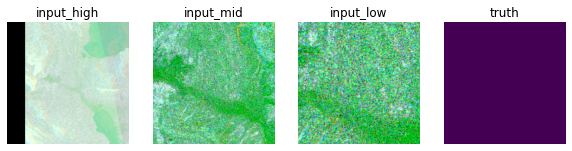

In [33]:
# idx = 16
idx = random.randint(0,280)
patches, truth = patch_list_val[idx]  ## (patches, truth)

patches_ = [patch.numpy().transpose(1,2,0).astype(np.float32) for patch in patches]
truth = truth.numpy().transpose(1,2,0)
patches_[0].shape
patches_list = [patches_[0],patches_[1],patches_[2],truth]
patches_name = ['input_high','input_mid','input_low','truth']
clip_list = [2,2,2,2]
col_bands_list = [(2,1,0), (2,1,0), (2,1,0), (0,0,0)]
plt.figure(figsize=(10,4))
imsShow(img_list=patches_list, img_name_list=patches_name, \
                                clip_list=clip_list, color_bands_list=col_bands_list)
